# Importar librerías necesarias

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
import os

import warnings
warnings.filterwarnings(action="ignore")

# Cargar el dataset

In [2]:
file_path = "Archivos de datos/CC GENERAL.csv"
df = pd.read_csv(file_path)

print(df.shape)
df.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Limpieza de datos

In [3]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Verificar valores nulos en el dataset

In [5]:
print("Valores nulos en cada columna:")
print(df.isnull().sum())

Valores nulos en cada columna:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [6]:
df.isna().mean()*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

Al revisar los informes, observamos que la mayoría de las variables tienen una media mucho mayor que su mediana. Esto indica que los datos están sesgados y debemos evaluar si podemos corregirlo.

#### Eliminación de variables

La primera etapa consiste en eliminar las variables que no son necesarias para el proceso de agrupamiento. En este caso, se eliminará CUST_ID porque contiene valores únicos.

In [7]:
df.drop('CUST_ID', axis=1, inplace = True)

#### Completando los valores nulos con el valor medio.

Para imputar los valores faltantes en la variable de pagos mínimos, no identifico ninguna columna que esté relacionada con esta característica y que nos ayude a estimar los valores que faltan. Parece que los datos faltan de manera aleatoria, por lo que podemos reemplazar los valores NaN simplemente con la mediana, ya que la distribución de los pagos mínimos está sesgada y, por ello, la mediana ofrece una mejor estimación de la tendencia central de esta variable.

In [8]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [9]:
print(df.isnull().sum())

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


#### Detección de valores duplicados

In [10]:
print(f"\nCantidad de filas duplicadas: {df.duplicated().sum()}")


Cantidad de filas duplicadas: 0


# ANÁLISIS EXPLORATORIO DE DATOS (EDA)

Es útil visualizar el grado de sesgo presente en el conjunto de datos.

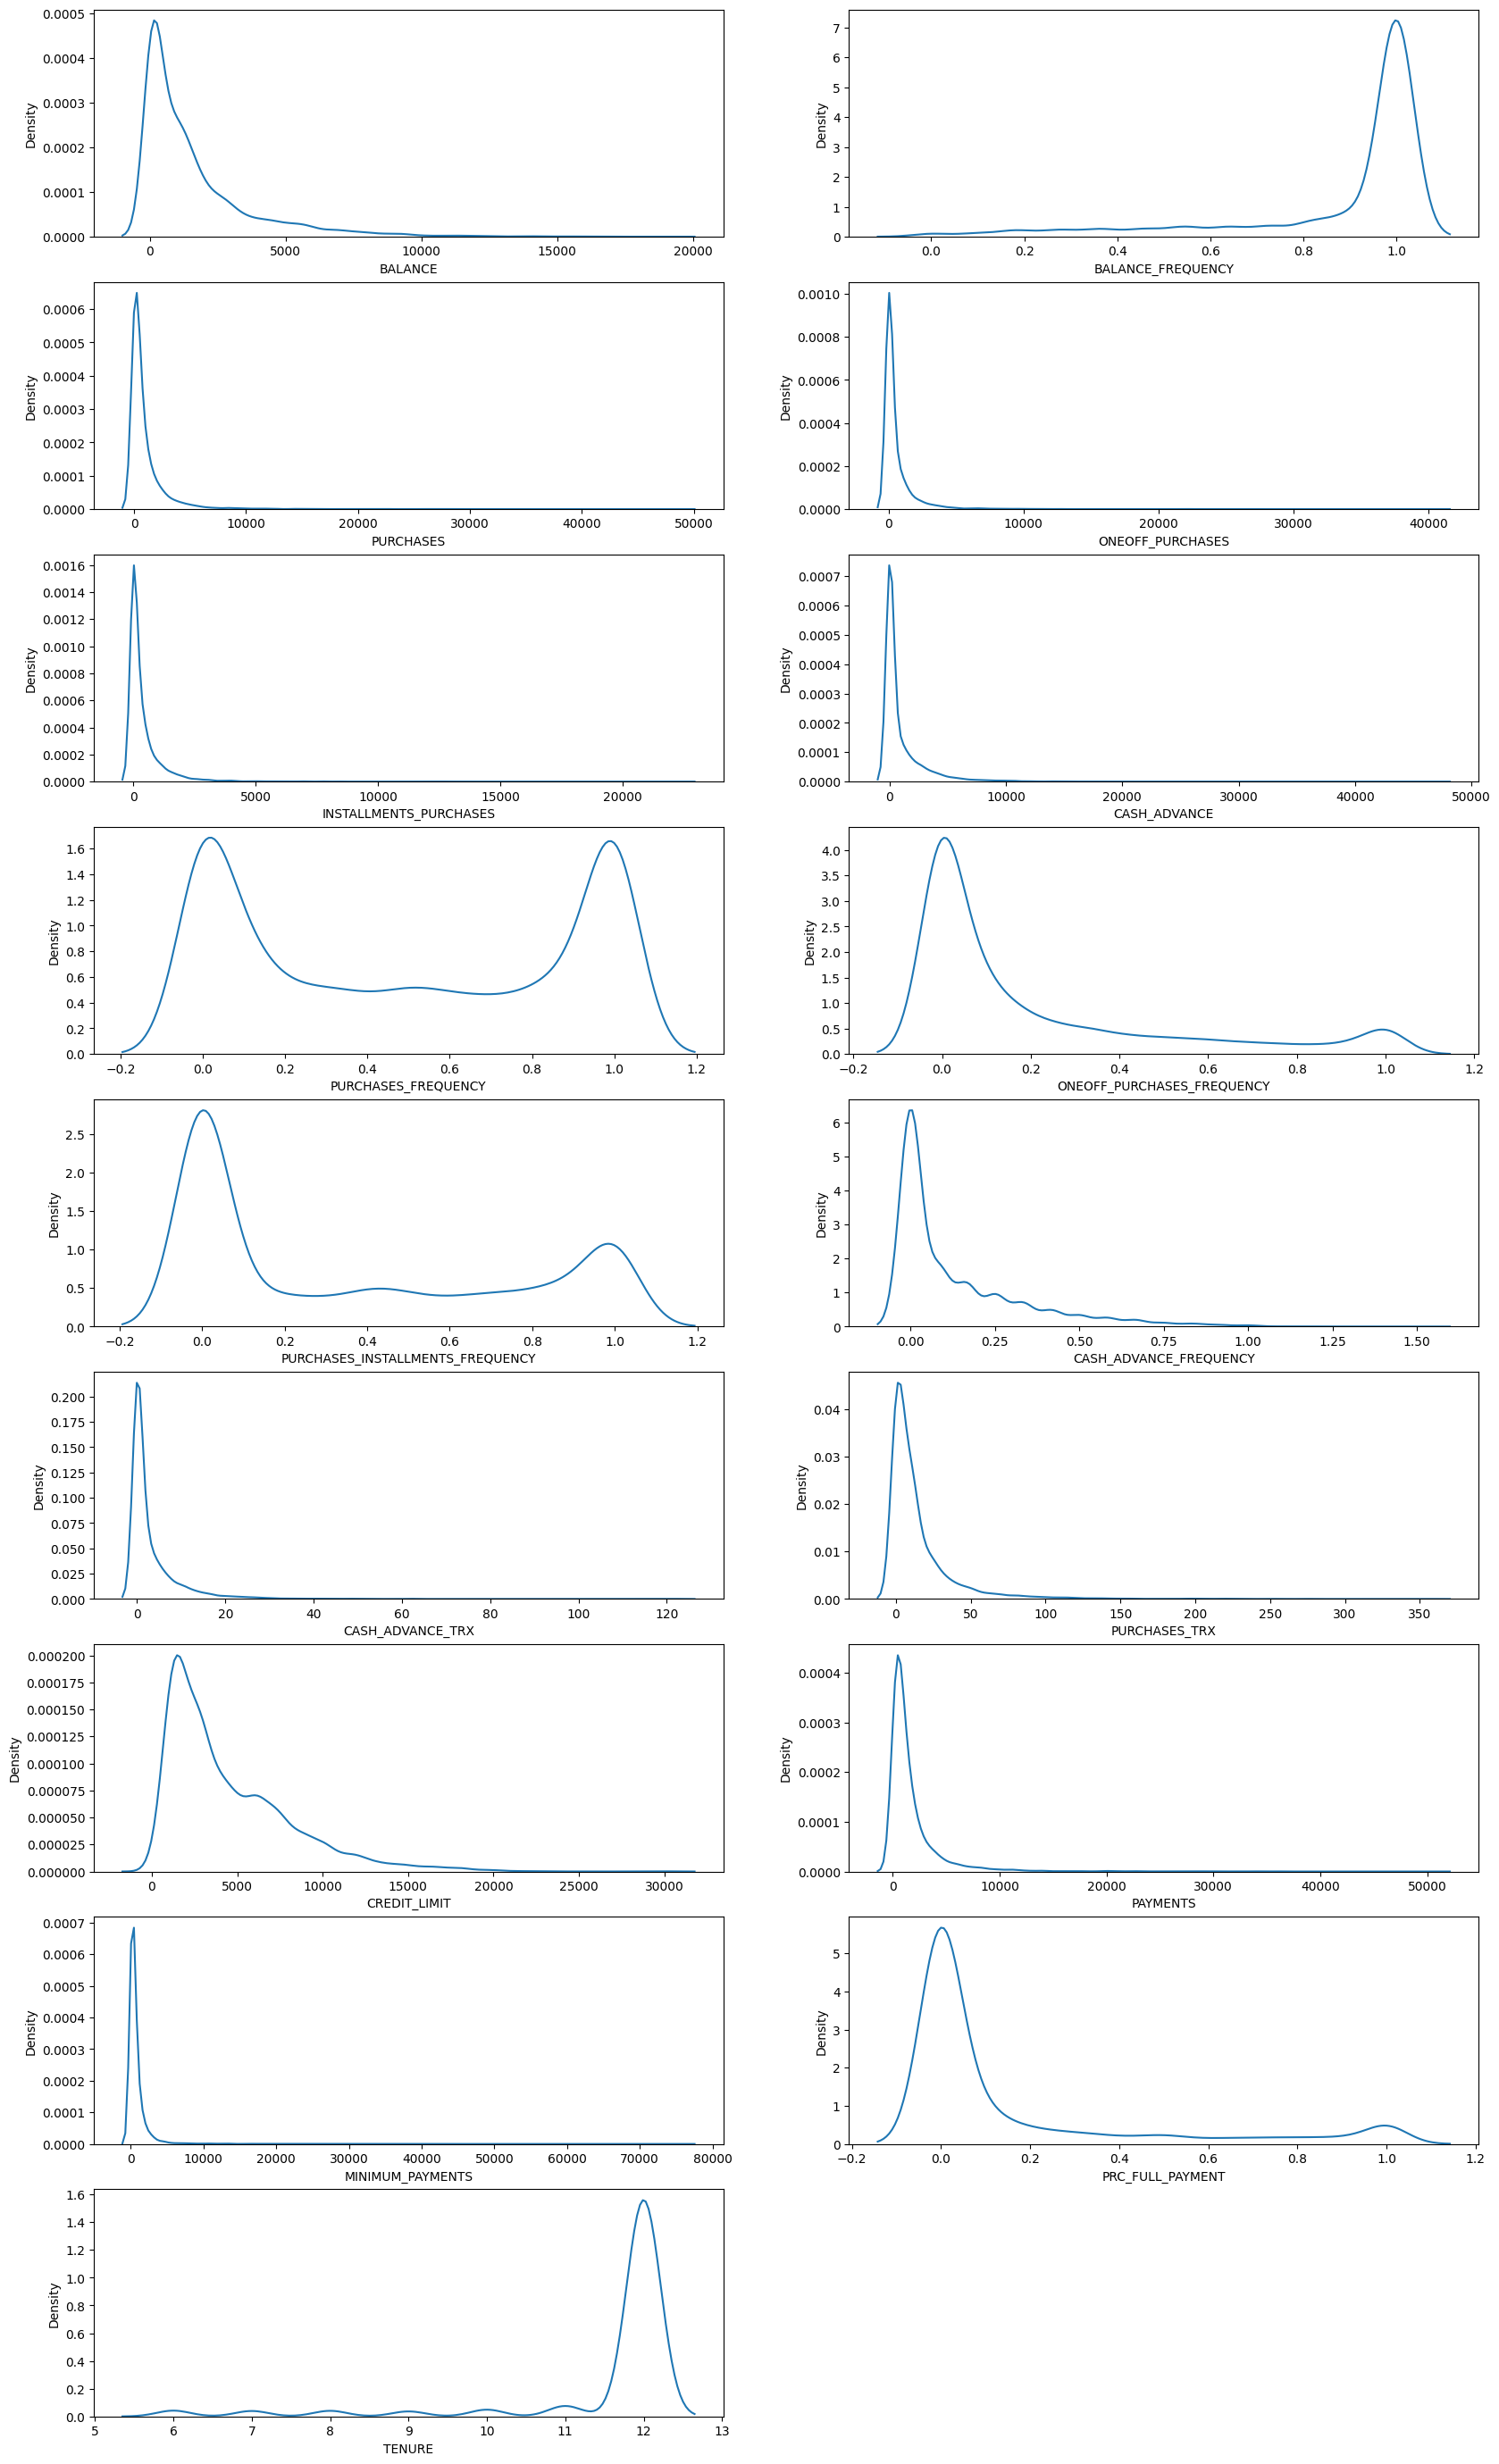

In [11]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

Hay un alto nivel de sesgo en los datos, y este varía entre las variables. Esto es común en conjuntos de datos como este, ya que siempre habrá algunos clientes que realizan transacciones inusualmente altas.

Dependiendo del propósito del análisis, puede o no ser necesario corregir este sesgo. Por ejemplo, si el objetivo es detectar anomalías mediante clustering, podría ser útil conservar los valores atípicos para que el modelo los identifique y agrupe adecuadamente. Sin embargo, en este caso, como se busca una buena visualización y una segmentación más clara, es conveniente reducir el sesgo en la medida de lo posible para facilitar la formación de clusters más definidos.

In [12]:
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
        'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 
        'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

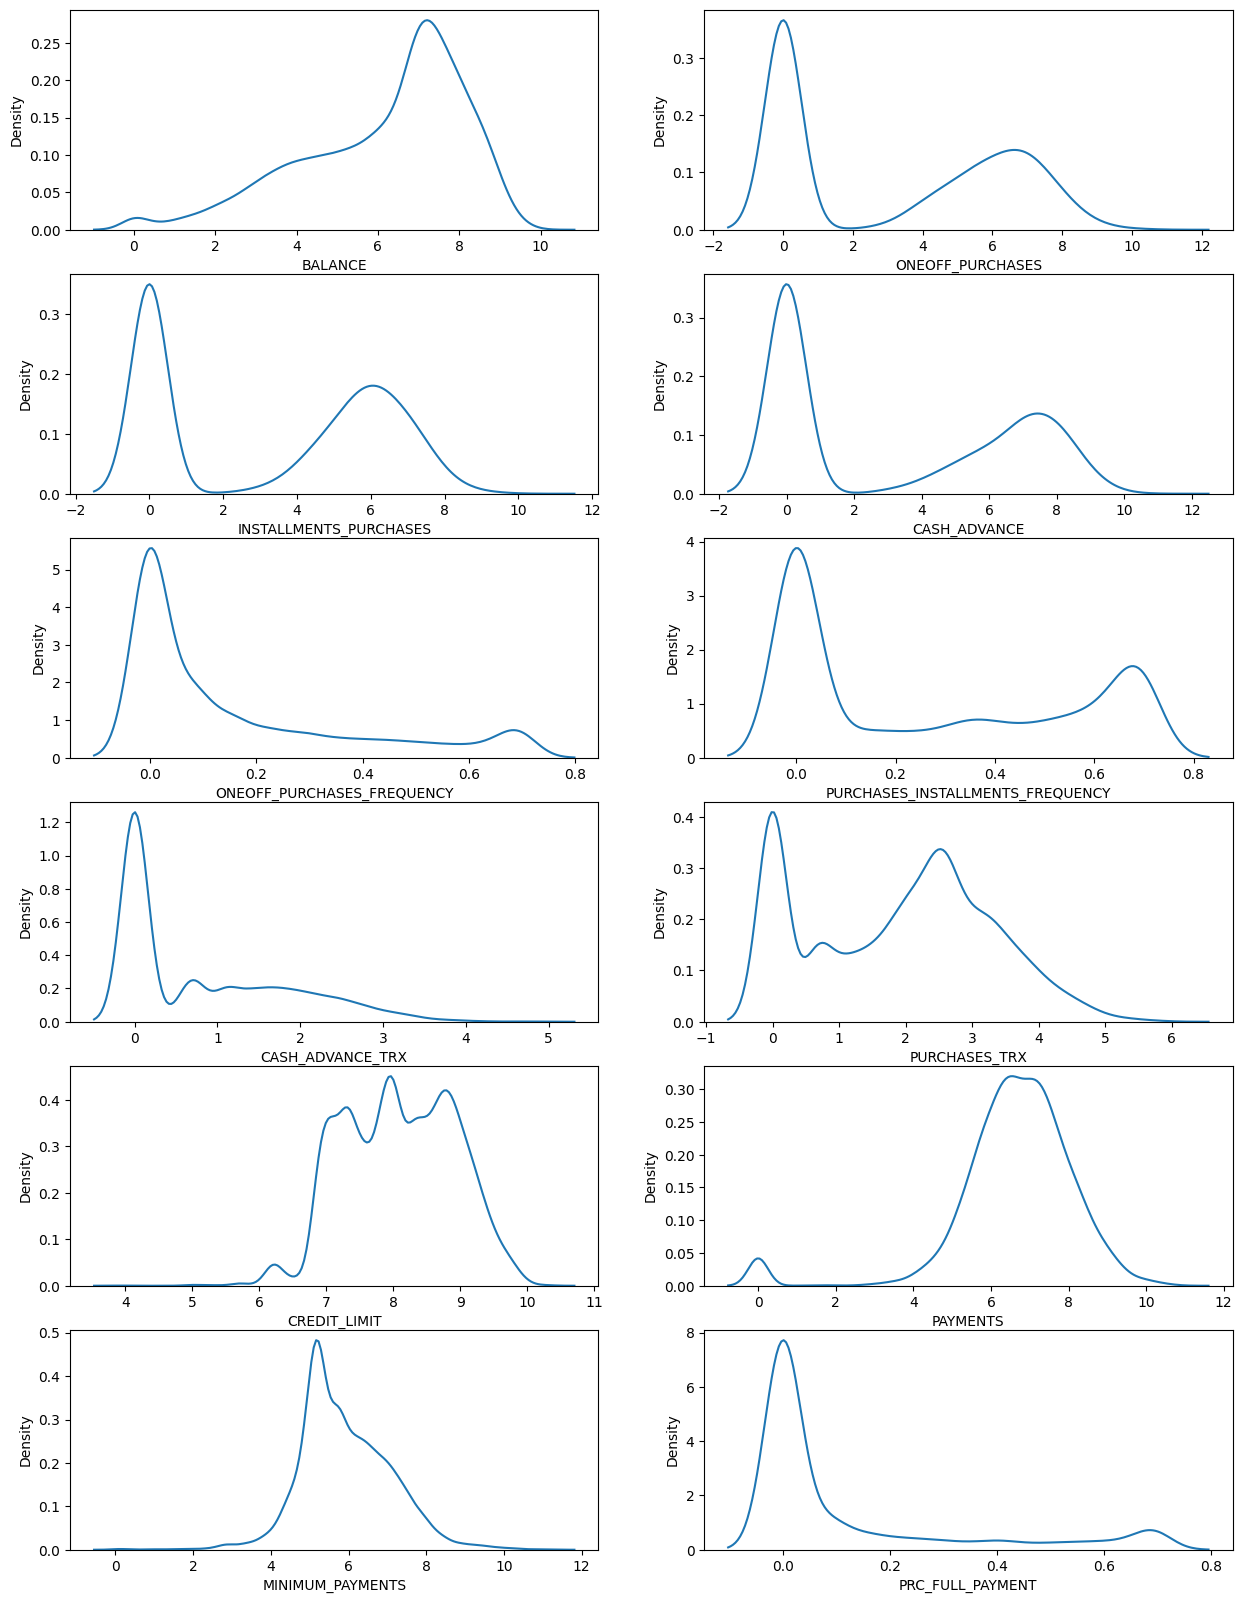

In [13]:
for col in cols:
    df[col] = np.log(1 + df[col])

plt.figure(figsize=(15,20))
for i, col in enumerate(cols):
    ax = plt.subplot(6, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
plt.show()

- Aunque la distribución no sea perfecta, representa una mejora significativa respecto al estado inicial. Lo importante es hacer los ajustes necesarios que permitan al modelo trabajar con datos más limpios y representativos, lo cual puede marcar la diferencia en la calidad de los resultados obtenidos. Cada mejora, por pequeña que parezca, contribuye a una segmentación más precisa y útil.

- Para lograr esto, se aplicó una transformación logarítmica a las variables con mayor sesgo, reduciendo el impacto de los valores extremos y ayudando a estabilizar la varianza. Luego, se visualizaron las nuevas distribuciones mediante gráficos de densidad para verificar que el ajuste efectivamente generó curvas más suaves y equilibradas, facilitando así una mejor interpretación y procesamiento por parte del modelo.

### Purchases Amount vs. Total Transaction

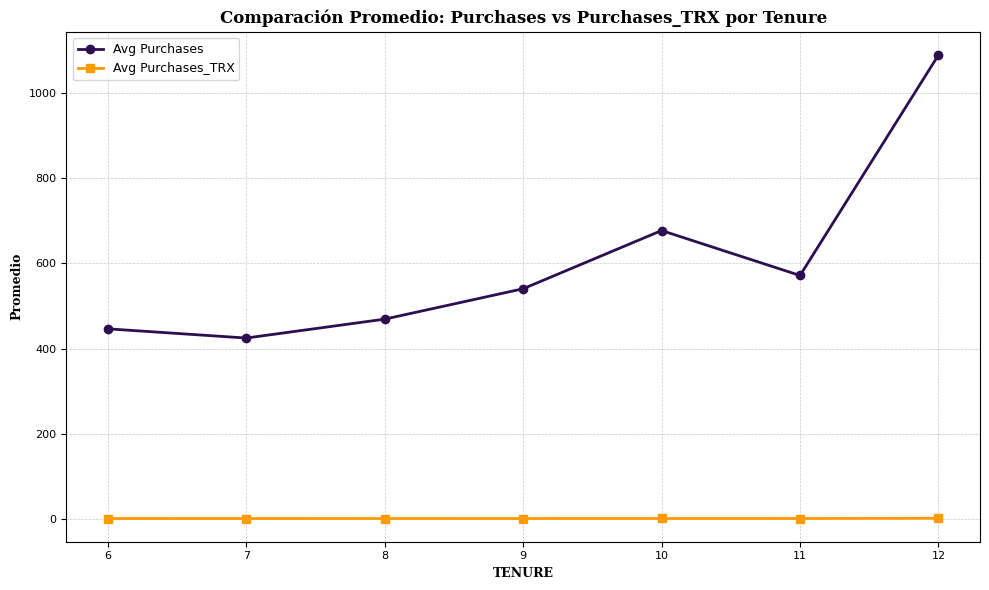

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que ya tienes cargado tu DataFrame `df`
# Aquí creamos los DataFrames agrupados necesarios:

eda2_1 = df[['PURCHASES', 'TENURE']].groupby('TENURE').agg(
    MIN=('PURCHASES', 'min'),
    AVG=('PURCHASES', 'mean'),
    MAX=('PURCHASES', 'max')
).reset_index()

eda2_2 = df[['PURCHASES_TRX', 'TENURE']].groupby('TENURE').agg(
    MIN=('PURCHASES_TRX', 'min'),
    AVG=('PURCHASES_TRX', 'mean'),
    MAX=('PURCHASES_TRX', 'max')
).reset_index()

# Configuraciones de estilo
xy_label = dict(fontweight='bold', fontsize=9, fontfamily='serif')
tenure = sorted(df['TENURE'].unique())

# --- NUEVO GRÁFICO: Líneas comparativas de AVG por TENURE ---
plt.figure(figsize=(10, 6))
plt.title('Comparación Promedio: Purchases vs Purchases_TRX por Tenure', fontsize=12, fontweight='bold', fontfamily='serif')

# Línea para PURCHASES
plt.plot(eda2_1['TENURE'], eda2_1['AVG'], label='Avg Purchases', marker='o', color='#2D0F51', linewidth=2)

# Línea para PURCHASES_TRX
plt.plot(eda2_2['TENURE'], eda2_2['AVG'], label='Avg Purchases_TRX', marker='s', color='#FF9A00', linewidth=2)

# Estética
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('TENURE', **xy_label)
plt.ylabel('Promedio', **xy_label)
plt.xticks(ticks=tenure, fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()


El gráfico de líneas indica que los clientes con 12 meses de antigüedad presentan los promedios más altos en compras y transacciones, lo que sugiere un mayor uso de la tarjeta con el tiempo. También se observan casos donde algunos clientes no realizan transacciones, posiblemente para mantener un alto límite de crédito y mejorar su puntaje.

Además, se evidencian contrastes entre clientes con tenures similares: los de 10 meses compran más que los de 11, pero hacen menos transacciones; mientras que los de 7 meses compran menos que los de 8, pero realizan más transacciones. Esto refleja distintos patrones de uso según la duración de la relación.

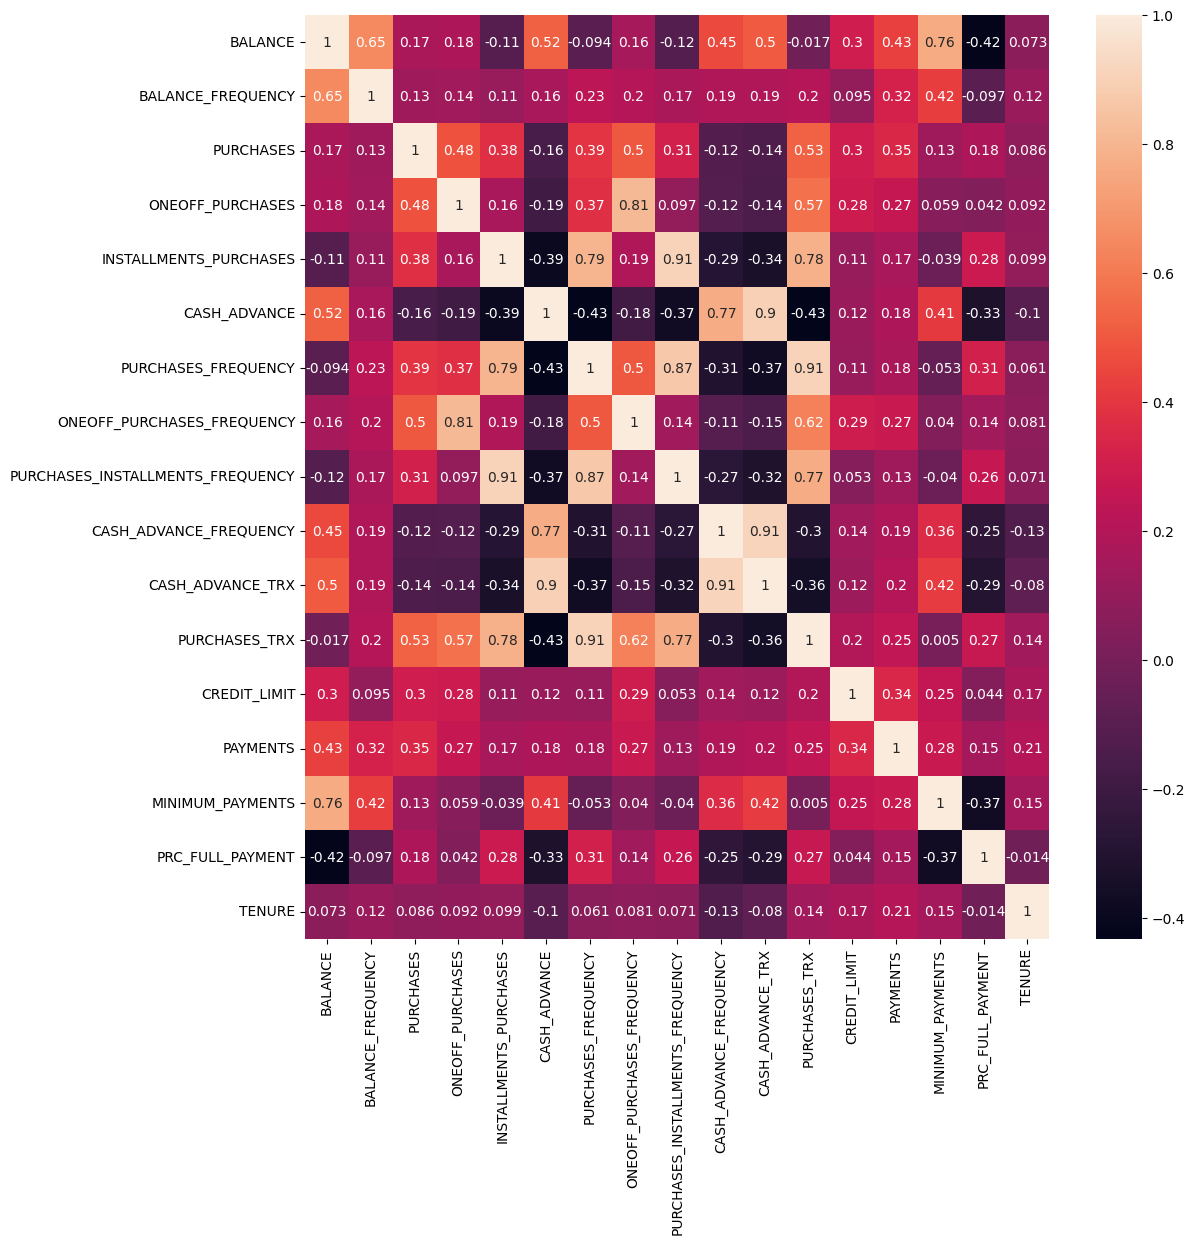

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

plt.savefig(os.path.join("Visualizaciones exportadas", "heatmap_correlacion.png"))  # Guardar antes de mostrar
plt.show()  # Mostrar después
plt.close()


- Se han identificado algunas variables que están correlacionadas entre sí. Existen diversas formas de abordar este tipo de situación, y en este caso se optará por reducir la dimensionalidad del conjunto de datos.

Para ello, se utilizará PCA (Análisis de Componentes Principales) como técnica de reducción.

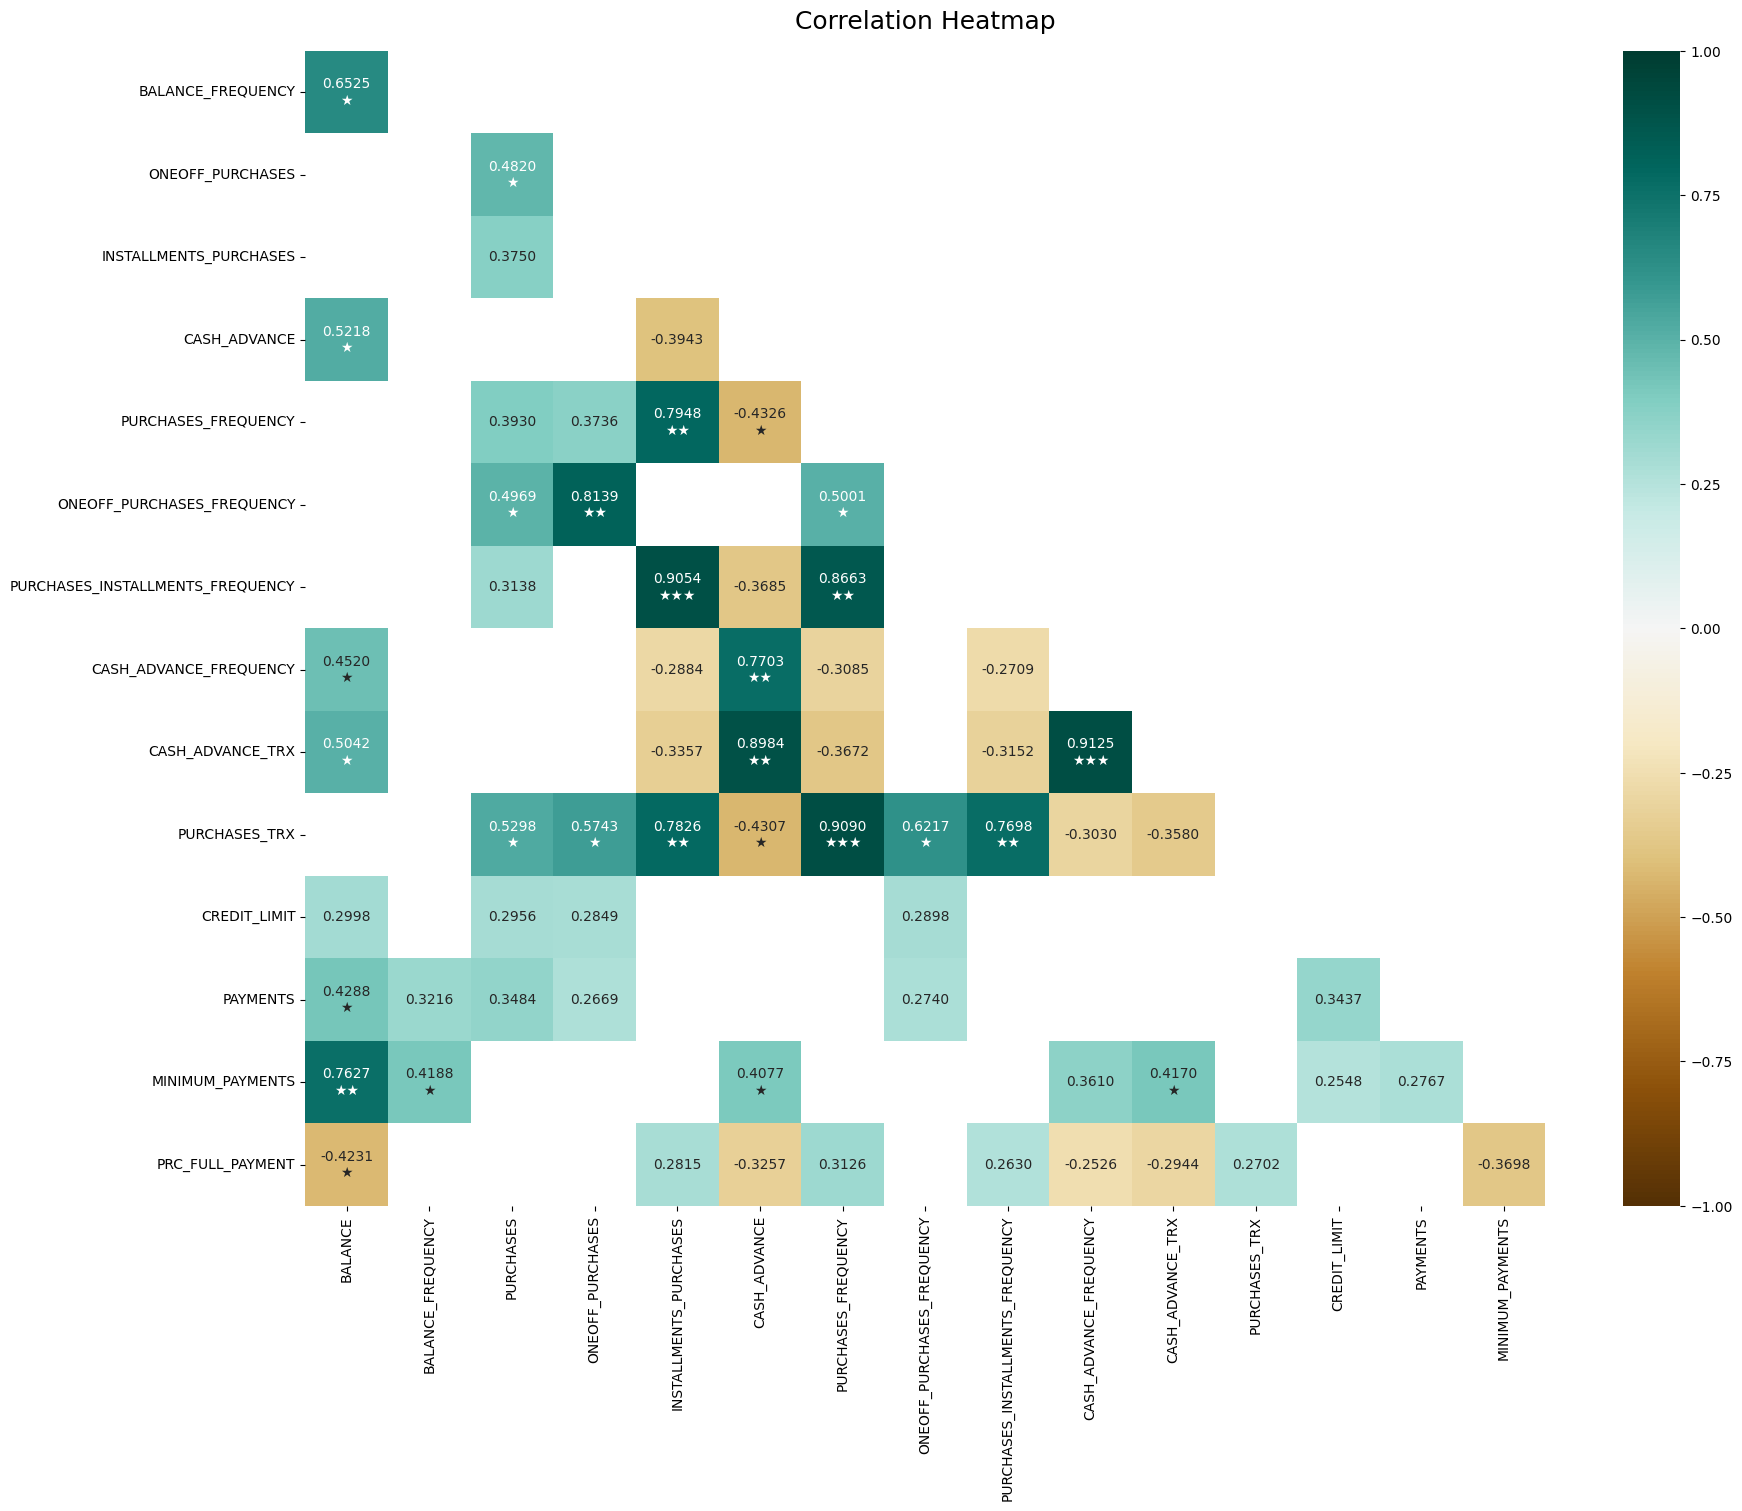

In [16]:
corr = df.corr()

f, ax = plt.subplots(figsize=(20, 15))

mask = np.triu(np.ones_like(corr, dtype=bool))

cut_off = 0.25  # only show cells with abs(correlation) at least this value
extreme_1 = 0.4 # show with a star
extreme_2 = 0.75  # show with a second star
extreme_3 = 0.9  # show with a third star
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n★')  
          + ('' if abs(val) < extreme_2 else '★')  
          + ('' if abs(val) < extreme_3 else '★') 
          for val in row] for row in corr.to_numpy()]
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)
plt.show()

# Guardar la figura
fig = heatmap.get_figure()
fig.savefig(os.path.join("Visualizaciones exportadas", "heatmap_correlacion_filtrado.png"))
plt.close(fig)

Este gráfico muestra una versión refinada de la matriz de correlación, en la que solo se incluyen las correlaciones con una magnitud igual o superior a 0.25. Además, se han agregado indicadores visuales (★) para destacar la intensidad de cada correlación:

- ⭐ para correlaciones con valor absoluto mayor a 0.40
- ⭐⭐ para correlaciones mayores a 0.75
- ⭐⭐⭐ para correlaciones muy altas, mayores a 0.90

El objetivo de este enfoque es enfocar el análisis en las relaciones más significativas, eliminando valores irrelevantes que podrían dificultar la interpretación.

También se eliminaron filas y columnas sin valores relevantes para mejorar la claridad del gráfico.

Este tipo de visualización es ideal cuando se quiere:
- Identificar variables altamente relacionadas que podrían estar capturando la misma información.
- Detectar posibles problemas de colinealidad.
- Seleccionar variables clave para modelos predictivos o descriptivos.

# Preprocesamiento

- Escalar las variables numéricas.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # conserva el 95% de la varianza
X_red = pca.fit_transform(X)

# Implementación de modelos

### K-Means

Previo a la aplicación del algoritmo K-Means, es necesario identificar cuántos clústeres son los más adecuados, para lo cual se empleará la técnica del codo.

In [18]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=23)
kmeans.fit(X_red)

KMeans(n_clusters=3, random_state=23)

#### Metodo del codo

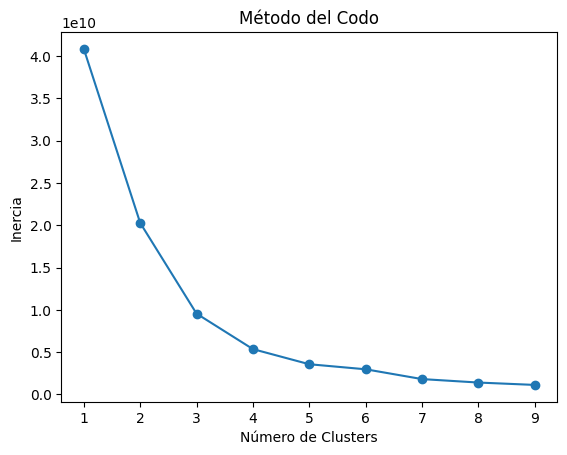

In [19]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X_red) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.savefig(os.path.join("Visualizaciones exportadas", "metodo_del_codo.png"))  # Guardar antes
plt.show()
plt.close()

#### Silhouette

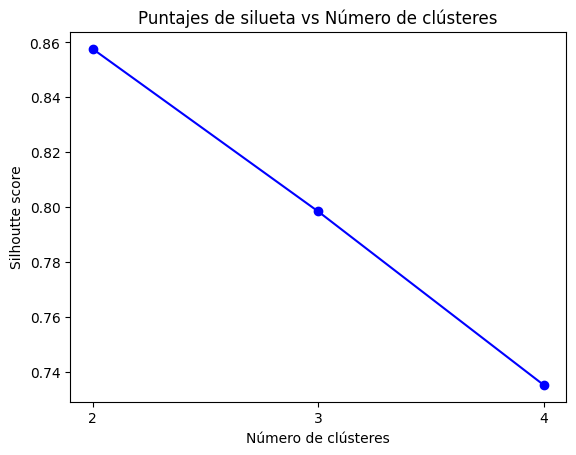

In [20]:
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(X_red, model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4])
plt.title('Puntajes de silueta vs Número de clústeres')
plt.xlabel('Número de clústeres')
plt.ylabel('Silhoutte score')
plt.savefig(os.path.join("Visualizaciones exportadas", "puntajes_silueta.png"))  # Guardar antes
plt.show()  
plt.close()

A simple vista, el gráfico del codo sugiere que el número óptimo de clusters podría estar entre 3 y 4. Sin embargo, para tomar una decisión más fundamentada, se evaluará el rendimiento utilizando el Silhouette. Esta métrica permitirá medir qué tan bien definidos están los grupos formados, ayudando a identificar cuál de las opciones proporciona una segmentación más coherente y significativa.

#### Visualización K-Means

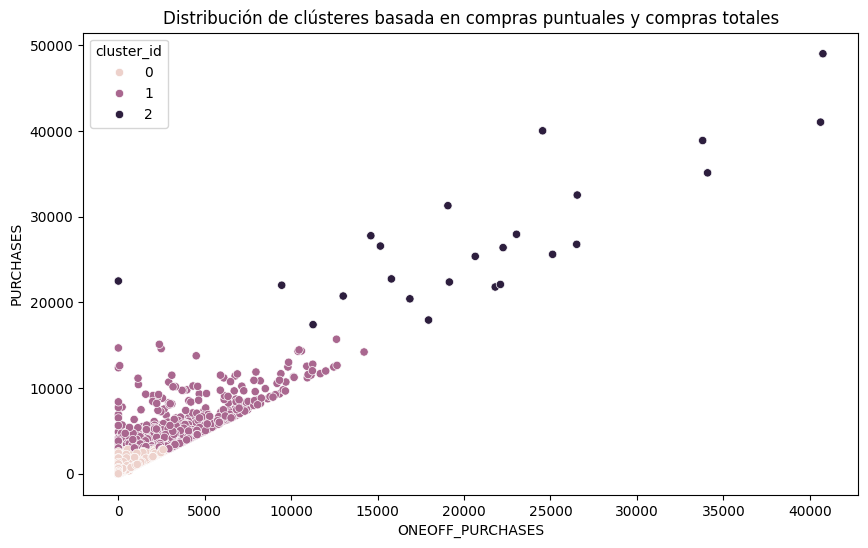

In [21]:
df['cluster_id'] = kmeans.labels_

for col in cols:
    df[col] = np.exp(df[col])

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ONEOFF_PURCHASES', y='PURCHASES', hue='cluster_id')
plt.title('Distribución de clústeres basada en compras puntuales y compras totales')
plt.savefig(os.path.join("Visualizaciones exportadas", "scatter_clusters_compras.png"))  # Guardar antes
plt.show() 
plt.close()

A partir del análisis realizado con el método del codo, se determinó que la cantidad ideal de clústeres para K-Means se encuentra entre 3 y 4. Aunque ambas opciones presentaban buenos resultados, se optó por utilizar 3 clústeres, ya que este número permite una segmentación más detallada de los datos. A continuación, se empleará esta configuración para crear los clústeres, generar visualizaciones de su distribución y utilizar gráficos de silueta para evaluar su efectividad.

#### Interpretación de Clustering con K-Means 

In [22]:
df.groupby('cluster_id')[['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
        'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 
        'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']].mean()

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
cluster_id,,,,,,,,,,,,
0,1461.313740,289.569880,268.006637,993.165303,1.160170,1.332115,4.324506,11.206371,4155.549442,1378.929412,793.836130,1.140983
1,2609.551530,3316.490616,1835.160725,833.550707,1.656653,1.716344,3.454172,62.642955,7916.800274,4889.641812,1350.984616,1.285473
2,5391.389571,21423.884583,6268.981250,930.689201,1.814583,1.696528,2.708333,124.375000,16334.333333,26970.902881,3275.877294,1.493845


#### DBSCAN

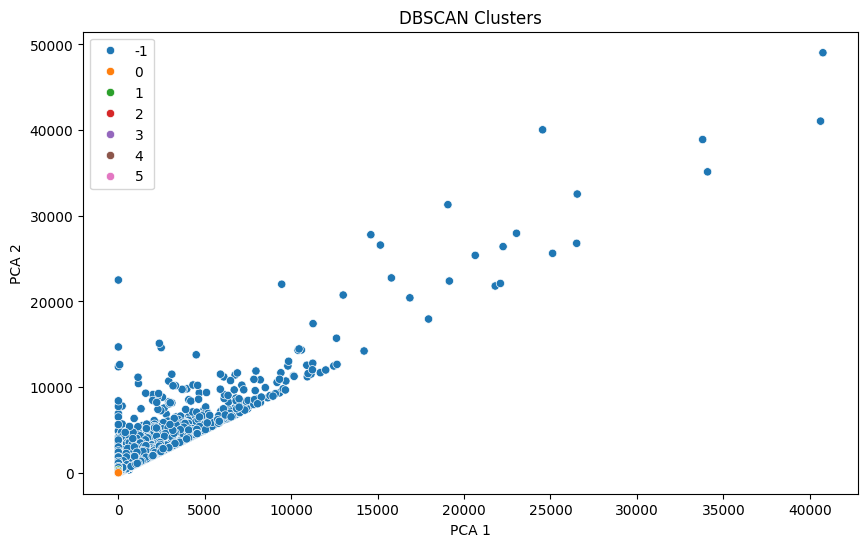

In [23]:
# DBSCAN con datos reducidos por PCA
dbscan = DBSCAN(eps=0.25, min_samples=5)  # Puedes ajustar eps
dbscan_labels = dbscan.fit_predict(X_red)

# Visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ONEOFF_PURCHASES', y='PURCHASES', hue=dbscan_labels, palette='tab10', legend='full')
plt.title('DBSCAN Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.savefig(os.path.join("Visualizaciones exportadas", "dbscan_clusters.png"))  # Guardar antes
plt.show()  
plt.close()

In [24]:
# Asignar etiquetas de DBSCAN al DataFrame
df['DBSCAN_Cluster'] = dbscan_labels

# Filtrar los datos sin ruido (DBSCAN marca el ruido como -1)
df_no_noise = df[df['DBSCAN_Cluster'] != -1]

# Agrupar y calcular la media por cluster
df_no_noise.groupby('DBSCAN_Cluster')[[
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
    'TENURE'
]].mean()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
DBSCAN_Cluster,,,,,,,,,,,,,,,,,
0,2142.934827,0.883047,0.000034,1.000034,1.042602,1963.754986,0.000126,1.000126,1.000122,0.272108,7.256737,1.003430,4015.829332,1630.235090,978.910344,1.044341,11.320431
1,24.247418,0.656566,299.951111,1.000000,300.951111,1.000000,0.611111,1.000000,1.564815,0.000000,1.000000,8.111111,5523.222222,364.441763,179.400260,1.374523,11.333333
2,1238.153086,0.983471,45.650000,46.650000,1.000000,1.000000,0.084710,1.084710,1.000000,0.000000,1.000000,2.000000,1501.000000,430.451037,1864.526983,1.000000,11.818182
3,1975.848560,1.000000,199.984000,161.000000,40.984000,552.564980,0.270000,1.070000,1.200000,0.120000,2.600000,4.400000,5491.000000,786.087684,1077.244953,1.000000,11.600000
4,36.380897,0.781818,359.988000,39.400000,322.588000,1.000000,0.650000,1.016667,1.575000,0.000000,1.000000,9.200000,2501.000000,465.738249,124.809482,1.633333,11.200000
5,91.196473,0.880520,499.994000,1.000000,500.994000,1.000000,0.854762,1.000000,1.776191,0.000000,1.000000,11.800000,2201.000000,539.174288,155.230458,1.523333,9.800000


#### PCA

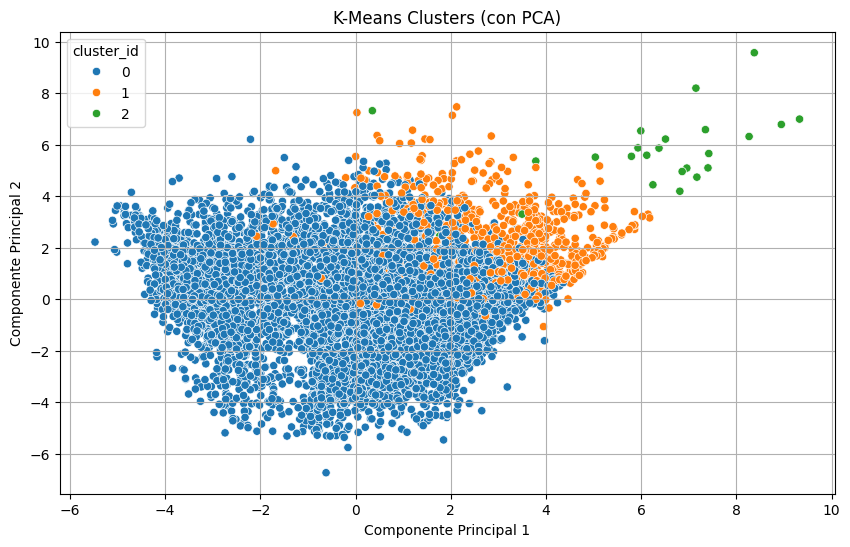

In [25]:
# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Agregamos las componentes principales al DataFrame para graficarlas
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Visualización con seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue=df['cluster_id'], palette='tab10', legend='full')
plt.title('K-Means Clusters (con PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.savefig(os.path.join("Visualizaciones exportadas", "kmeans_pca.png"))  # Guardar antes
plt.show() 
plt.close()

In [26]:
# Parte 5.1.1: Interpretación de Reducción de dimensionalidad con PCA 
pca_cluster_summary = df.groupby('cluster_id')[[
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
    'TENURE'
]].mean()
display(pca_cluster_summary)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster_id,,,,,,,,,,,,,,,,,
0,1461.313740,0.868581,555.327844,289.569880,268.006637,993.165303,0.451753,1.160170,1.332115,0.140060,4.324506,11.206371,4155.549442,1378.929412,793.836130,1.140983,11.486209
1,2609.551530,0.973368,5148.763516,3316.490616,1835.160725,833.550707,0.910616,1.656653,1.716344,0.083181,3.454172,62.642955,7916.800274,4889.641812,1350.984616,1.285473,11.860465
2,5391.389571,0.946591,27690.865833,21423.884583,6268.981250,930.689201,0.888194,1.814583,1.696528,0.038194,2.708333,124.375000,16334.333333,26970.902881,3275.877294,1.493845,11.916667


#### t-SNE

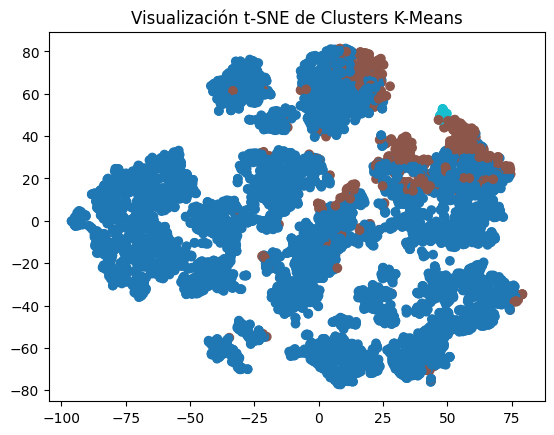

In [27]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['cluster_id'], cmap='tab10')
plt.title('Visualización t-SNE de Clusters K-Means')
plt.savefig(os.path.join("Visualizaciones exportadas", "tsne_clusters_kmeans.png"))  # Guardar antes
plt.show()  
plt.close()

In [28]:
# Parte 5.2.1: Interpretación de Reducción de dimensionalidad con t-SNE 
tsne_cluster_summary = df.groupby('cluster_id')[[
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
    'TENURE'
]].mean()
display(tsne_cluster_summary)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster_id,,,,,,,,,,,,,,,,,
0,1461.313740,0.868581,555.327844,289.569880,268.006637,993.165303,0.451753,1.160170,1.332115,0.140060,4.324506,11.206371,4155.549442,1378.929412,793.836130,1.140983,11.486209
1,2609.551530,0.973368,5148.763516,3316.490616,1835.160725,833.550707,0.910616,1.656653,1.716344,0.083181,3.454172,62.642955,7916.800274,4889.641812,1350.984616,1.285473,11.860465
2,5391.389571,0.946591,27690.865833,21423.884583,6268.981250,930.689201,0.888194,1.814583,1.696528,0.038194,2.708333,124.375000,16334.333333,26970.902881,3275.877294,1.493845,11.916667


In [29]:
# Parte 6: Análisis 
print("Clusters únicos KMeans:", df['cluster_id'].unique()) 
print("Clusters únicos DBSCAN:", df['DBSCAN_Cluster'].unique())

Clusters únicos KMeans: [0 1 2]
Clusters únicos DBSCAN: [-1  0  1  2  3  5  4]





### Reflexión y comunicación

### **¿Qué tipo de perfiles se pueden identificar?**

A través del análisis de clústeres con K-Means y DBSCAN, se identificaron diferentes perfiles de usuarios de tarjetas de crédito, basados en sus patrones de uso y comportamiento financiero. Algunos de los perfiles destacados incluyen:

- Usuarios con alto gasto en una sola compra: Aquellos que usan la tarjeta principalmente para compras únicas (alto ONEOFF_PURCHASES) y tienen buen historial de pago (PRC_FULL_PAYMENT alto).

- Usuarios con uso recurrente y fraccionado: Realizan compras a plazos (alto INSTALLMENTS_PURCHASES), con alta frecuencia (PURCHASES_INSTALLMENTS_FREQUENCY), pero montos menores.

- Usuarios con uso de adelantos en efectivo: Se identificaron usuarios que recurren frecuentemente a CASH_ADVANCE, posiblemente reflejando necesidad de liquidez.

- Usuarios inactivos o de bajo uso: Clientes que apenas realizan transacciones o mantienen un balance bajo.

Estas segmentaciones se visualizaron eficazmente tras aplicar reducción de dimensionalidad con PCA y t-SNE, lo que permitió una interpretación más clara de los patrones.

### **¿Qué diferencias clave surgieron entre los modelos?**

**K-Means:**

- Requiere definir el número de clusters de antemano. Se utilizó el método del codo y el análisis de la silueta, encontrando que 3 clusters era un valor razonable.

- Produjo clústeres bien definidos y fáciles de interpretar.

- Se beneficiaba de la reducción de dimensionalidad previa (PCA) para una mejor segmentación.

**DBSCAN:**

- No requiere especificar el número de clústeres.

- Detectó outliers automáticamente (ruido etiquetado como -1).

- Fue útil para identificar estructuras más orgánicas, pero más sensible a la escala de los datos y parámetros (eps, min_samples).

- Resultó en algunos datos clasificados como ruido, lo que puede excluir patrones válidos si no se ajustan bien los parámetros.

**PCA:**

- Ayudó a reducir la dimensionalidad del dataset, conservando la mayoría de la varianza (2 componentes principales).

- Fue útil para visualización y mejoró el rendimiento de K-Means.

**t-SNE:**

- Fue utilizado principalmente para visualización no lineal.

- Ayudó a observar agrupaciones naturales en 2D que no eran tan evidentes con PCA.

### **¿Qué limitaciones encontraron y cómo las abordarían?**

1. Escalado y sesgo en los datos: Algunas variables estaban muy sesgadas (por ejemplo, BALANCE, PURCHASES, CASH_ADVANCE), lo cual podía distorsionar los clústeres. Esto se abordó aplicando transformación logarítmica y estandarización.

2. Elección del número de clústeres en K-Means: Definir el número óptimo es subjetivo. Aunque se utilizó el método del codo y la puntuación de silueta, siempre existe cierto margen de arbitrariedad.

3. Sensibilidad de DBSCAN: La elección de eps es crítica y afecta drásticamente los resultados. Si no se ajusta bien, muchos datos pueden ser tratados como ruido.

4. Reducción de dimensionalidad: Aunque PCA es útil, pierde algo de interpretabilidad. t-SNE, aunque visualmente útil, no conserva distancias globales, lo que puede inducir a interpretaciones erróneas si no se tiene cuidado.

**¿Cómo abordarlas?**

- Probar más métodos de clusterización como Gaussian Mixture Models (GMM) para detectar solapamientos entre grupos.

- Ajustar hiperparámetros de DBSCAN con una búsqueda más sistemática (grid search).

- Aplicar validación cruzada no supervisada o técnicas como Davies–Bouldin Index.

- Utilizar más variables derivadas (por ejemplo, ratios entre PAYMENTS y BALANCE) para enriquecer los perfiles.

- Realizar análisis de estabilidad de clústeres para comprobar la robustez de los perfiles encontrados.